In [12]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import torch
from torch import nn 
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [2]:
# this is to display all the columns in the dataframe
pd.set_option('display.max_columns', None)
# this is to display all the rows in the dataframe
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('data\\kc_house_data.csv')

In [5]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Представленные данные содержат информацию о различных объектах недвижимости. В столбцах представлены следующие данные:

id: Уникальный идентификатор объекта недвижимости.

date: Дата продажи объекта недвижимости.

price: Цена продажи недвижимости.

bedrooms: Количество спален в доме.

bathrooms: Количество ванных комнат в доме.

sqft_living: Квадратных метров жилой площади в собственности.

sqft_lot: Площадь участка или земельного участка, на котором находится недвижимость.

floors: Количество этажей в доме.

waterfront: Бинарный индикатор (0 или 1), показывающий, есть ли у объекта вид на набережную.

view: Цифровой индикатор (0-4) качества вида, открывающегося из здания.

condition: Цифровой индикатор (1-5) общего состояния объекта недвижимости.

grade: Числовой показатель (1-13), характеризующий общее качество объекта недвижимости.

sqft_above: Жилая площади на первом этаже.

sqft_basement: Жилая площадь в подвале.

yr_built: Год постройки дома.

yr_renovated: Год, когда в отеле проводился последний ремонт.

zipcode: Почтовый индекс, в котором находится объект недвижимости.

lat: Широтные координаты местоположения объекта недвижимости.

long: Долготная координата местоположения объекта недвижимости.

sqft_living15: Квадратные метр жилой площади ближайших 15 объектов недвижимости.

sqft_lot15: Площадь участка из 15 ближайших объектов недвижимости. Эти данные будут полезны для анализа тенденций в сфере недвижимости, характеристик недвижимости и потенциальных факторов, влияющих на цены на недвижимость.

In [8]:
df.drop(['id', 'lat','long'], axis=1, inplace=True)

In [9]:
df['bathrooms'] = df['bathrooms'].round(0).astype(int)

In [10]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [11]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

Визуализация взаимосвязей\
Чтобы построить эффективную модель линейной регрессии для прогнозирования зависимого признака "price", нам сначала необходимо тщательно проанализировать взаимосвязи между всеми доступными столбцами. Это позволит нам определить, какие независимые признаки наиболее тесно коррелируют с изменением "price" и позволяют прогнозировать ее. Поняв эти взаимосвязи, мы сможем затем выбрать наиболее релевантные столбцы для включения в линейный регрессионный анализ, гарантируя, что модель будет обладать наилучшей прогностической способностью.

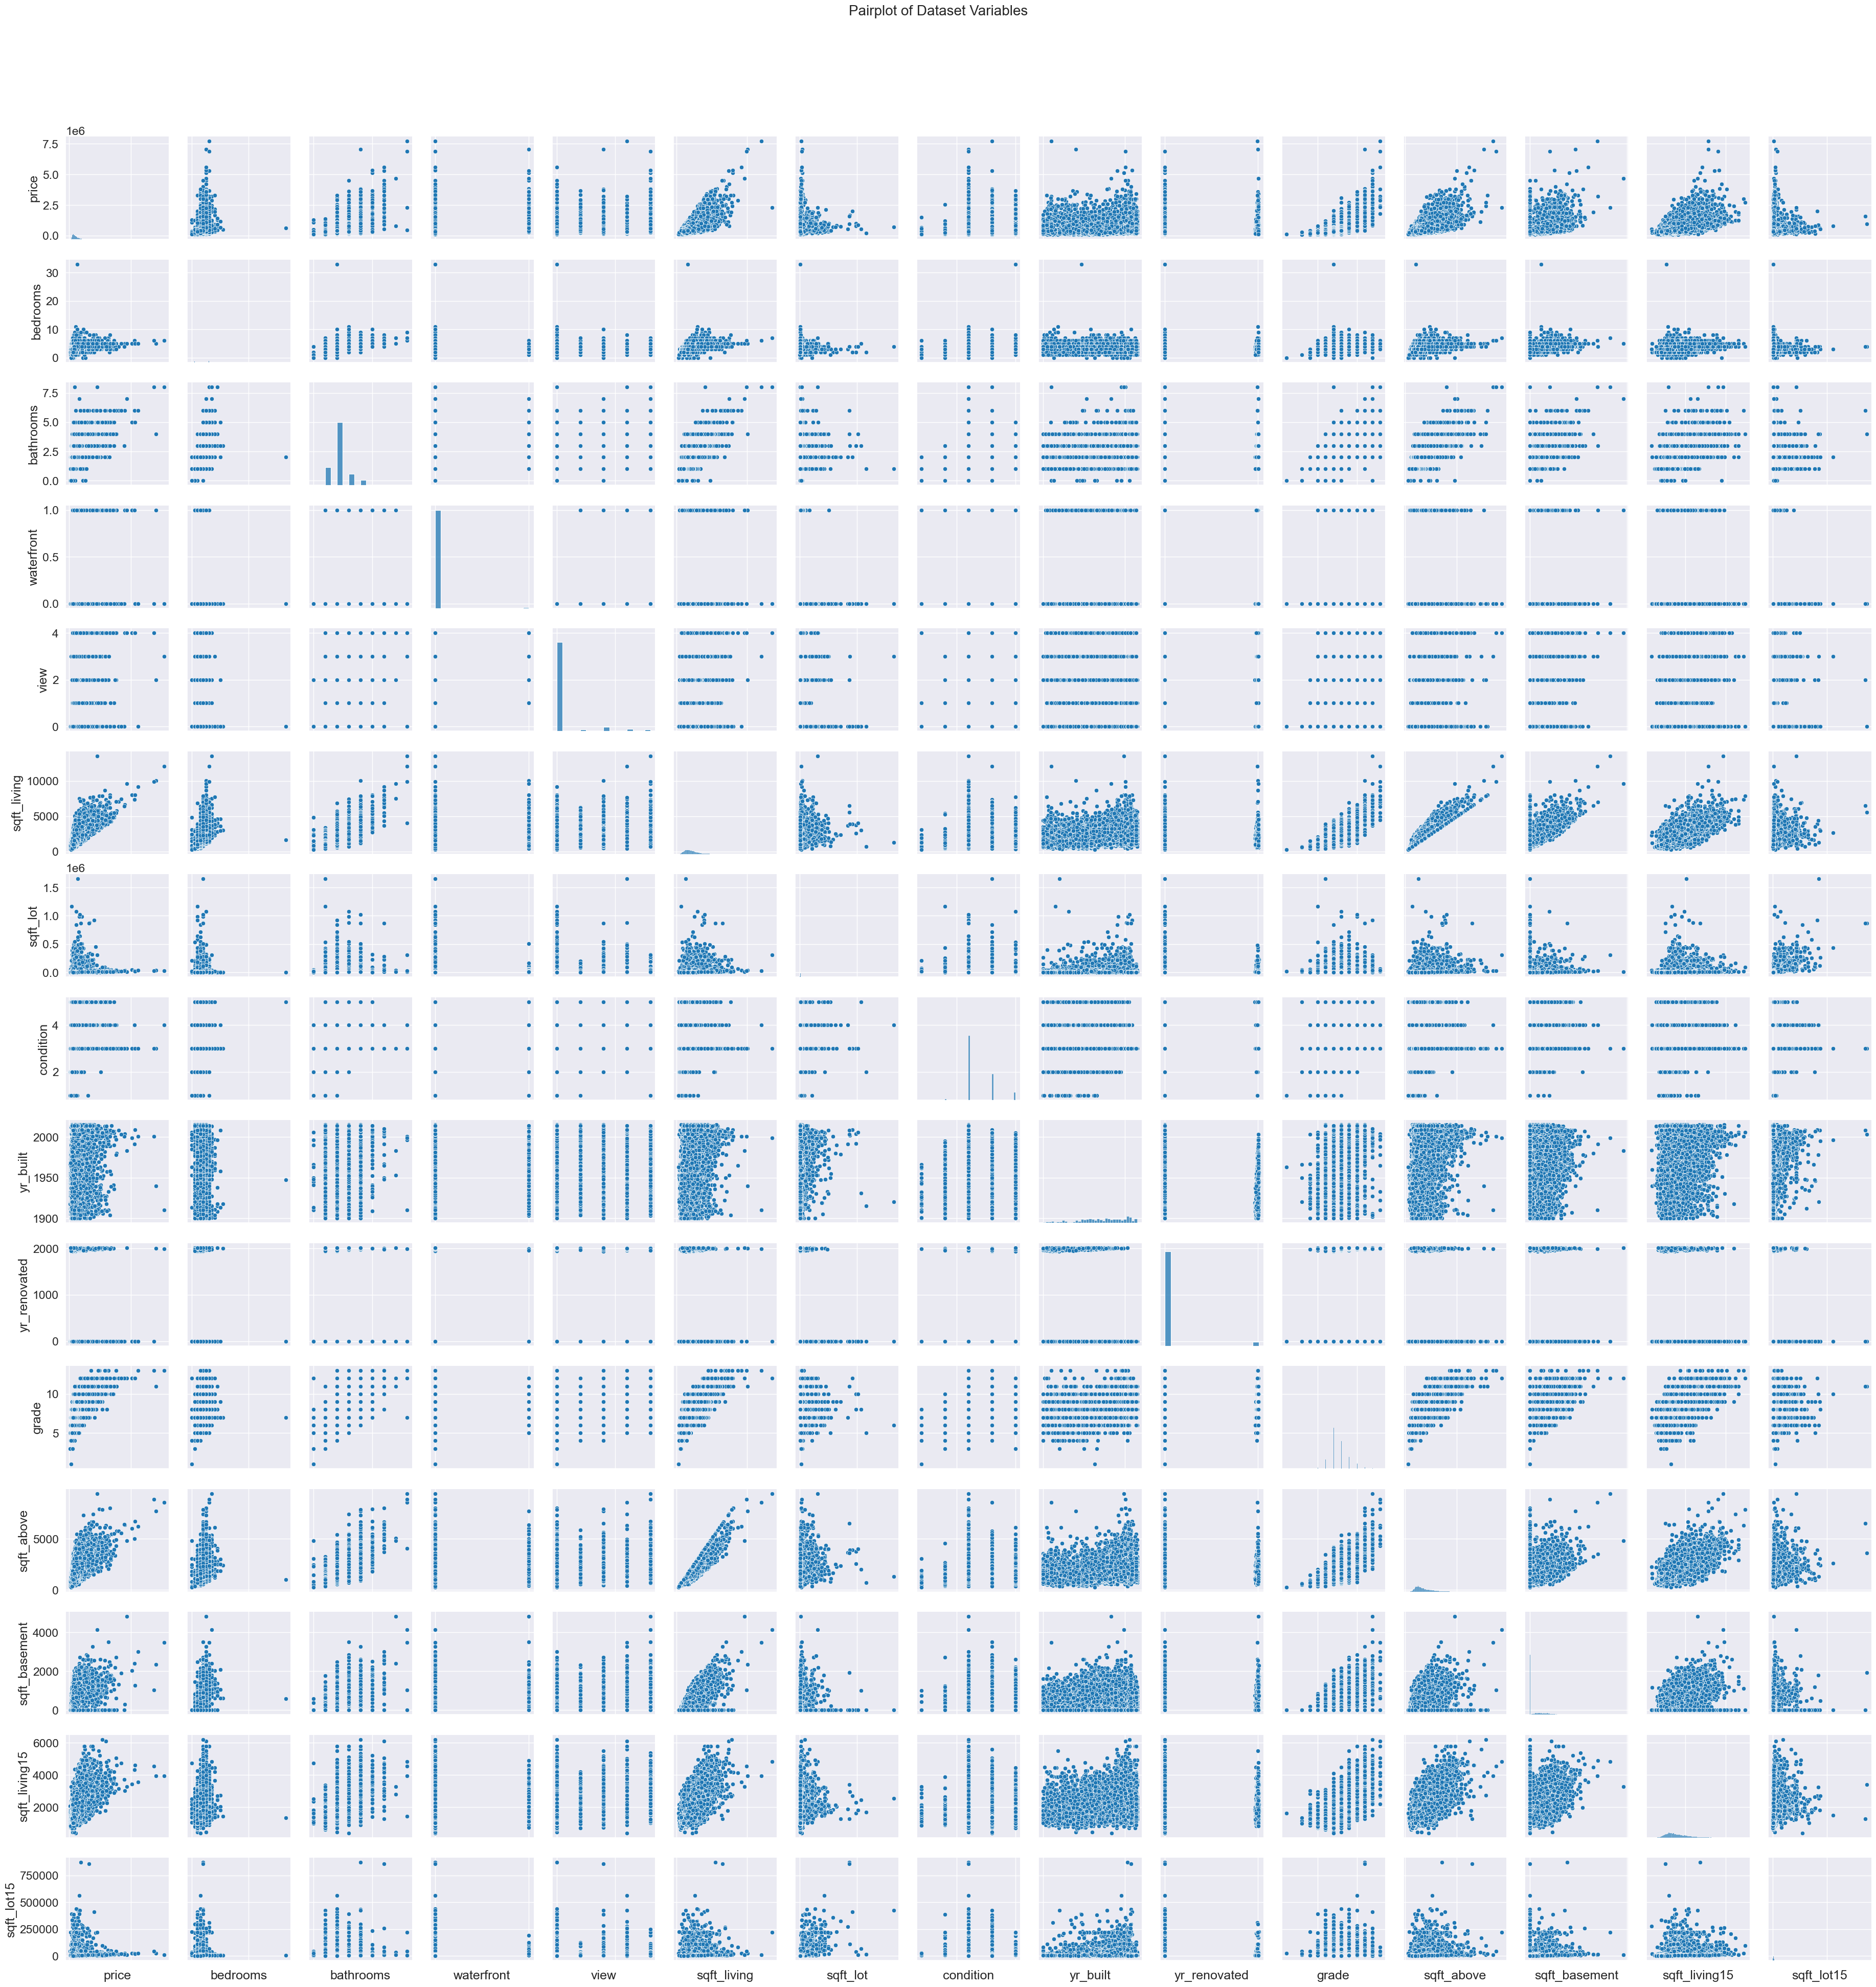

In [13]:
# Making pairplot 
with sns.plotting_context("notebook", font_scale=1.5):
    g = sns.pairplot(df, vars=['price', 'bedrooms', 'bathrooms','waterfront','view', 'sqft_living', 'sqft_lot', 'condition', 'yr_built','yr_renovated','grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'])
    g.set(xticklabels=[])
    plt.suptitle('Pairplot of Dataset Variables', y=1.05, fontsize=20)
    plt.show()

sqft_living:
Диаграмма рассеяния между sqft_living и ценой демонстрирует очень четкую, сильную положительную линейную зависимость.
Это говорит о том, что sqft_living, вероятно, является очень важным фактором, определяющим цену.

sqft_above:
Диаграмма рассеяния между sqft_above и ценой также показывает положительную линейную зависимость, хотя и не такую тесную, как sqft_living.
Тем не менее, sqft_above, по-видимому, является важным фактором, определяющим цену.

sqft_basement:
Диаграмма рассеяния между sqft_basement и ценой указывает на положительную взаимосвязь, хотя корреляция не такая сильная, как sqft_living и sqft_above.
Однако площадь готового подвала, вероятно, является важным фактором при определении цены недвижимости, поэтому ее следует учитывать как независимую переменную.

bedrooms:
Зависимость между спальнями и ценой менее очевидна на диаграмме, с некоторой кластеризацией и наложением количества разных спален, однако ее следует включать в качестве независимой переменной.

bathrooms:
Как и в случае со спальнями, диаграмма для ванных комнат и цены показывает несколько неясную взаимосвязь.
Тем не менее, количество ванных комнат является важной характеристикой, которая может повлиять на цену недвижимости, поэтому ее следует рассматривать как независимую переменную.

sqft_living15:
Диаграмма рассеяния между sqft_living15 и ценой показывает положительную линейную зависимость.
 
sqft_lot15:
Диаграмма рассеяния между sqft_lot15 и ценой указывает на положительную, но довольно слабую взаимосвязь.
Тем не менее, исторические данные о размере лота могут внести некоторую дополнительную информацию в модель.

price = β0 + β1 Feature_1+ β2 Feature_2 + (.....)+βn * Feature_n

Где:

β0 - это точка пересечения y (прогнозируемая цена, когда все остальные переменные равны 0)\ β1 - βn - коэффициенты (наклоны) для каждой независимой переменной.

One-hot encoding the zipcode,condition\
Целью быстрого кодирования является преобразование категориальных переменных в формат. Быстрое кодирование выполняется для столбцов "zipcode" и "condition", которые, вероятно, являются категориальными переменными в наборе данных DataFrame. Это преобразование позволяет модели машинного обучения использовать эти категориальные характеристики в процессе обучения и прогнозирования.

In [17]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    # Ensure the dummies are in 0 and 1 format
    dummies = dummies.astype(int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

# Assuming 'dataset' is your pandas DataFrame
df = onehot_encode(df, 'zipcode', 'zip')
df = onehot_encode(df, 'condition', 'house_condition')
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,house_condition_1,house_condition_2,house_condition_3,house_condition_4,house_condition_5
0,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,7,1180,0,1955,0,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,7,2170,400,1951,1991,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,6,770,0,1933,0,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,7,1050,910,1965,0,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,8,1680,0,1987,0,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'zip_98001',
       'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006',
       'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014',
       'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 

In [19]:
Independent_In_Tensor,Price_In_Tensor= torch.tensor(df[[
    'sqft_living','grade' ,'sqft_above', 'sqft_lot','sqft_basement', 'bathrooms','sqft_living15',
       'sqft_lot15','zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011',
       'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031',
       'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039',
       'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065',
       'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077',
       'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106',
       'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115',
       'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122',
       'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144',
       'zip_98146', 'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168',
       'zip_98177', 'zip_98178', 'zip_98188', 'zip_98198', 'zip_98199','house_condition_1', 'house_condition_2', 'house_condition_3',
       'house_condition_4', 'house_condition_5'
]].values, dtype=torch.float32),torch.tensor(df[['price']].values, dtype=torch.float32)

In [20]:
Independent_In_Tensor,Price_In_Tensor

(tensor([[1.1800e+03, 7.0000e+00, 1.1800e+03,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00],
         [2.5700e+03, 7.0000e+00, 2.1700e+03,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00],
         [7.7000e+02, 6.0000e+00, 7.7000e+02,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [1.0200e+03, 7.0000e+00, 1.0200e+03,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00],
         [1.6000e+03, 8.0000e+00, 1.6000e+03,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00],
         [1.0200e+03, 7.0000e+00, 1.0200e+03,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00]]),
 tensor([[221900.],
         [538000.],
         [180000.],
         ...,
         [402101.],
         [400000.],
         [325000.]]))

In [21]:
Independent_In_Tensor.shape,Price_In_Tensor.shape

(torch.Size([21613, 83]), torch.Size([21613, 1]))

In [22]:
train_split = int(0.8*len(Independent_In_Tensor))
X_train,y_train = Independent_In_Tensor[:train_split],Price_In_Tensor[:train_split]
X_test,y_test=Independent_In_Tensor[train_split:],Price_In_Tensor[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(17290, 17290, 4323, 4323)

In [23]:
X_train[0]

tensor([1.1800e+03, 7.0000e+00, 1.1800e+03, 5.6500e+03, 0.0000e+00, 1.0000e+00,
        1.3400e+03, 5.6500e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+

In [24]:
y_train[0]

tensor([221900.])

Model\
Creating the Model in PyTorch to perform multiple linear regression

In [25]:
class MultipleLinearRegressionModel(nn.Module):
    def __init__(self, num_features):
        super(MultipleLinearRegressionModel, self).__init__()
        # Initialize weights and bias as parameters
        self.weights = nn.Parameter(torch.randn(num_features), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Compute the linear combination of the input features
        linear_output = torch.matmul(x, self.weights) + self.bias
        return linear_output

In [26]:
len(X_train[1])

83

In [27]:
X_train[1]

tensor([2.5700e+03, 7.0000e+00, 2.1700e+03, 7.2420e+03, 4.0000e+02, 2.0000e+00,
        1.6900e+03, 7.6390e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+

In [28]:
X_train.shape[1]

83

In [29]:
torch.manual_seed(41)
num_features = X_train.shape[1]

# Initialize the model
model_0 = MultipleLinearRegressionModel(num_features)

In [30]:
# Setup a loss function
loss_fn = nn.MSELoss()

# Setup an optimizer
optimizer=torch.optim.Adam(model_0.parameters(), lr=0.01)

In [31]:
list(model_0.parameters())

[Parameter containing:
 tensor([ 0.2465, -0.4717, -1.5184, -0.2124,  0.5660, -1.6637,  0.3338,  1.6051,
         -0.6919, -0.5399, -0.9585, -0.5706, -0.5434, -0.4347,  0.4036, -0.3977,
         -0.7593, -0.9401,  0.2895, -0.3930,  0.1495, -1.4453,  0.3230,  0.2691,
         -1.8582,  0.6758,  0.6179, -0.7597,  0.3135,  1.2129, -1.0562,  1.9104,
         -0.3103, -0.2846, -1.2708,  2.7563,  1.7416, -0.6473,  1.2869,  0.2798,
         -1.0929, -1.0251,  0.1212,  0.6108, -0.3316,  0.5742, -2.0137,  0.8630,
         -0.8498, -1.9837,  0.0832, -1.2066, -0.3511, -0.1648, -0.3937,  0.2237,
         -0.6855, -1.1598, -0.3605, -0.0950,  1.1122,  0.3517,  0.9366, -0.1875,
          1.3988, -0.0521, -1.0056,  0.9786, -1.3384,  1.1003,  1.2431, -0.4991,
         -1.2313,  1.1386, -0.3020, -1.1019, -0.2384,  0.5583, -1.9817,  0.8498,
         -0.3904,  0.3433, -0.8983], requires_grad=True),
 Parameter containing:
 tensor([-0.0466], requires_grad=True)]

In [32]:
list(model_0.parameters())[1].shape, y_train.shape

(torch.Size([1]), torch.Size([17290, 1]))

Размерность параметра model и целевой переменной y_train не совпадают, поэтому нам нужно сделать их совместимыми, прежде чем вводить данные в модель.

В этом случае проблема заключается в том, что единственный выходной параметр модели имеет форму torch.Size([1]), тогда как целевая переменная y_train имеет форму torch.Size([17290, 1]). Это означает, что модель ожидает получить одно выходное значение, но целевой переменной является двумерный тензор с несколькими выборками.

Чтобы решить эту проблему, мы можем использовать squeeze()

In [33]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()
y_train.shape,y_test.shape

(torch.Size([17290]), torch.Size([4323]))

Training the model and Evaluation

In [34]:
epochs = 10000
epoch_count=[]
loss_values=[]
test_loss_values=[]
for epoch in range(epochs+1):
    model_0.train()

    # Forward pass
    y_pred = model_0(X_train)

    # Compute the loss
    loss = loss_fn(y_pred, y_train)
    rmse=torch.sqrt(loss)

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update the parameters
    optimizer.step()

    # Evaluate the model
    model_0.eval()
    with torch.inference_mode():  # truns off gradient tracking & a couple more things behind the scenes
        #1. Do the forward pass
        test_pred=model_0(X_test)
        #Calculate the loss
        test_loss =loss_fn(test_pred,y_test)
        rmse_test=torch.sqrt(test_loss)
    if epoch%1000==0:
        epoch_count.append(epoch)
        loss_values.append(rmse)
        test_loss_values.append(rmse_test)
        print(f"Epoch:{epoch}| Train RMSE:{rmse} | Test RMSE : {rmse_test}")

Epoch:0| Train RMSE:632890.1875 | Test RMSE : 665878.8125
Epoch:1000| Train RMSE:545155.75 | Test RMSE : 581518.625
Epoch:2000| Train RMSE:499351.5 | Test RMSE : 530794.375
Epoch:3000| Train RMSE:456215.03125 | Test RMSE : 483016.46875
Epoch:4000| Train RMSE:415888.5 | Test RMSE : 438316.625
Epoch:5000| Train RMSE:378913.1875 | Test RMSE : 397296.6875
Epoch:6000| Train RMSE:345945.375 | Test RMSE : 360726.125
Epoch:7000| Train RMSE:317769.0 | Test RMSE : 329540.3125
Epoch:8000| Train RMSE:295179.84375 | Test RMSE : 304704.03125
Epoch:9000| Train RMSE:278742.71875 | Test RMSE : 286908.125
Epoch:10000| Train RMSE:268441.1875 | Test RMSE : 276120.9375


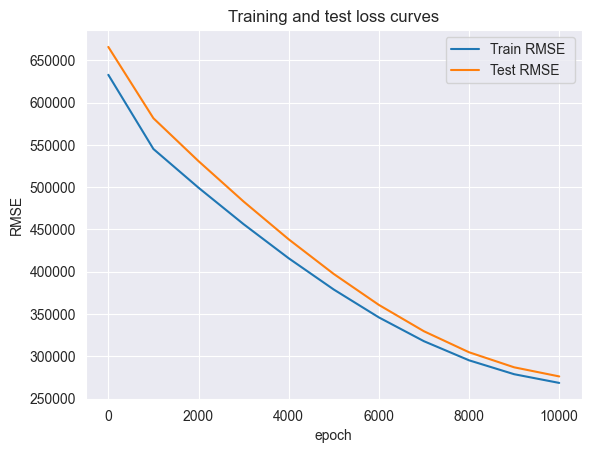

In [35]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label='Train RMSE ')
plt.plot(epoch_count,test_loss_values,label='Test RMSE')
plt.title("Training and test loss curves")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend()

В результате кривые RMSE обучения и теста (среднеквадратичная ошибка) уменьшаются по мере увеличения количества периодов в процессе обучения.Тенденция к уменьшению как обучающей, так и тестовой кривых RMSE по мере увеличения числа периодов указывает на то, что модель обучается и улучшает свои характеристики в процессе обучения.